# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Made Yurista Indani Sukma
- **Email:** indanisukma@gmail.com
- **ID Dicoding:** yuristaindani

## Menentukan Pertanyaan Bisnis

- Apakah ada pola penggunaan sepeda berdasarkan jam dalam sehari?
- Bagaimana pengaruh suhu terhadap penyewaan sepeda?
- Bagaimana kondisi cuaca ekstrim memengaruhi penyewaan sepeda?
- Bagaimana working day dan week day memengaruhi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install numpy pandas scipy matplotlib seaborn


In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [237]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [238]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data day_df dan hour_df berhasil dimuat dengan kolom-kolom yang sesuai.
- Data ini akan memberikan gambaran yang lebih mendalam tentang pola penyewaan sepeda.

### Assessing Data

In [239]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [240]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [241]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [242]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [243]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [244]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [245]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [246]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada proses penilaian data, data dinilai untuk melihat apakah ada *missing value, invalid value, duplicate value,* dan *inaccurate value.*
- Setelah dilakukan proses penilaian, ternyata terdapat data yang tipe datanya tidak sesuai yaitu pada kolom 'hr' dengan tipe data object. Kesahalan ini terjadi pada kolom di dokumen day.csv dan juga hour.csv. Tipe data ini perlu kita ganti menjadi datetime.

### Cleaning Data

In [247]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [248]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [249]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [250]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada proses *cleaning*, dilakukan pembersihan data ke data yang tidak sesuai yaitu mengubah tipe data pada kolom 'hr' dari yang awalnya object menjadi datetime.
- Kode pembersihan ini berhasil berjalan dan dapat dilihat pada kode hour_df.info() day_df.info() bahwa tipe data pada kolom 'hr' telah berubah menjadi datetime.
- Dengan mengonversi kolom tanggal menjadi format datetime, kita mempermudah manipulasi data berdasarkan waktu dan memastikan bahwa analisis temporal dapat dilakukan dengan tepat.

## Exploratory Data Analysis (EDA)

### Explore ...

In [251]:
print("Pola penyewaan sepeda berdasarkan jam perhari")
average_rentals_by_hour = hour_df.groupby('hr')['cnt'].mean().reset_index()
print(average_rentals_by_hour)

Pola penyewaan sepeda berdasarkan jam perhari
    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


In [252]:
temp_stats = day_df['temp'].describe()
print("Statistik Deskriptif Suhu:")
print(temp_stats)

correlation = day_df[['temp', 'cnt']].corr().iloc[0, 1]
print(f"\nKorelasi antara suhu dan jumlah penyewaan: {correlation:.2f}")

Statistik Deskriptif Suhu:
count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

Korelasi antara suhu dan jumlah penyewaan: 0.63


In [253]:
weather_effect = day_df.groupby('weathersit')['cnt'].mean().reset_index()
print("Rata-rata penyewaan sepeda berdasarkan kondisi cuaca:")
print(weather_effect)

# Mappin kondisi cuaca
weather_effect['weathersit'] = weather_effect['weathersit'].map({
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan Ringan',
    4: 'Hujan Berat'
})

Rata-rata penyewaan sepeda berdasarkan kondisi cuaca:
   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714


In [254]:
# Menghitung rata-rata penyewaan berdasarkan hari kerja
avg_rentals_workingday = day_df.groupby('workingday')['cnt'].mean().reset_index()
avg_rentals_workingday.columns = ['Working Day', 'Average Rentals']

print(avg_rentals_workingday)

# Menghitung rata-rata penyewaan berdasarkan hari dalam seminggu
avg_rentals_weekday = day_df.groupby('weekday')['cnt'].mean().reset_index()
avg_rentals_weekday.columns = ['Weekday', 'Average Rentals']

print(avg_rentals_weekday)


   Working Day  Average Rentals
0            0      4330.168831
1            1      4584.820000
   Weekday  Average Rentals
0        0      4228.828571
1        1      4338.123810
2        2      4510.663462
3        3      4548.538462
4        4      4667.259615
5        5      4690.288462
6        6      4550.542857


**Insight:**
- Data menunjukkan pola penyewaan sepeda yang signifikan berdasarkan jam, dengan puncak penyewaan pada jam sibuk. Ini dapat diinterpretasikan sebagai indikasi bahwa sepeda digunakan sebagai alat transportasi selama jam kerja.
- Analisis statistik suhu menunjukkan rentang suhu yang umum selama periode pengukuran. Ini menjadi landasan untuk mengevaluasi pengaruh suhu terhadap penyewaan sepeda.
- Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, yang menunjukkan bahwa penyewa lebih cenderung menggunakan sepeda pada hari-hari yang lebih hangat. Korelasi ini mengindikasikan bahwa suhu merupakan faktor penting dalam keputusan penyewaan.
- Rata-rata penyewaan sepeda menunjukkan perbedaan yang signifikan antara hari kerja dan hari non-kerja. Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk kegiatan sehari-hari pada hari kerja dibandingkan dengan akhir pekan.
- Rata-rata penyewaan berdasarkan hari dalam seminggu menunjukkan fluktuasi, dengan penyewaan tertinggi terjadi pada hari kerja. Ini menunjukkan pola perilaku pengguna yang berbeda pada setiap hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

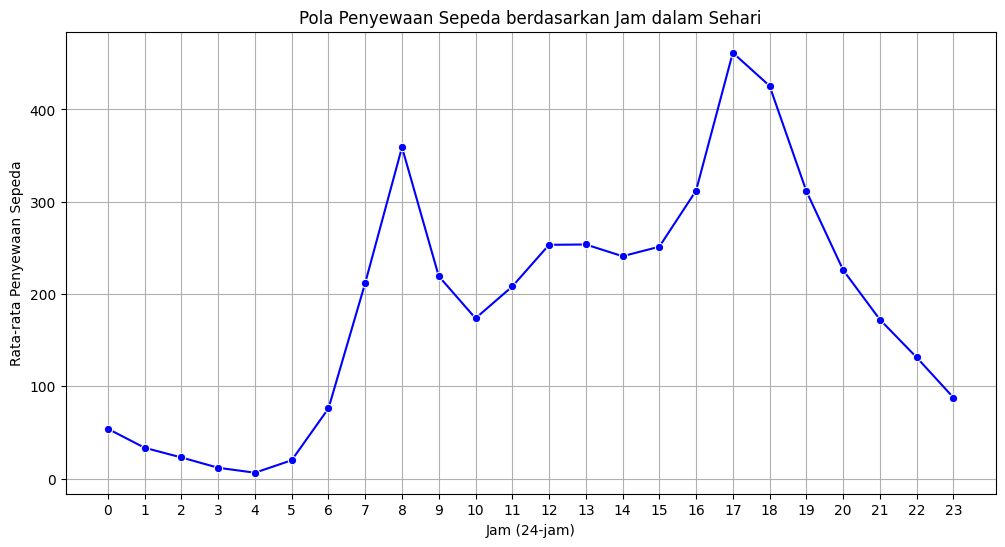

In [255]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=average_rentals_by_hour, marker='o', color='blue')
plt.title('Pola Penyewaan Sepeda berdasarkan Jam dalam Sehari')
plt.xlabel('Jam (24-jam)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

## Pertanyaan 2:

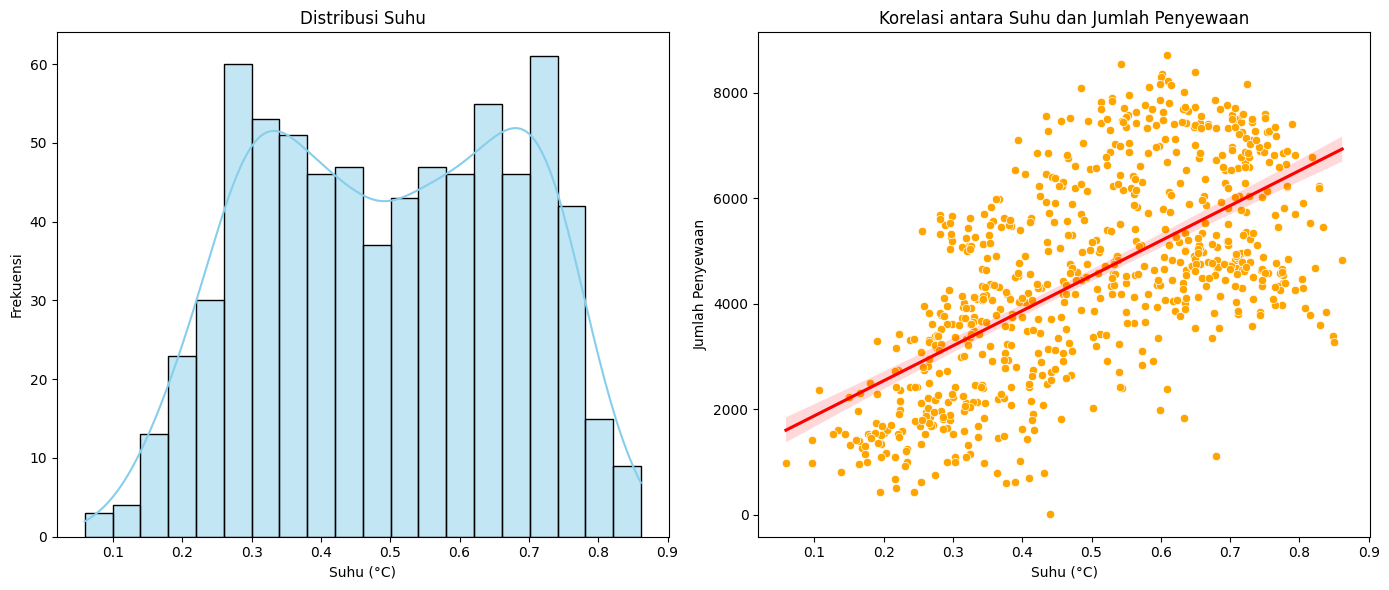

In [256]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Visualisasi Histogram Suhu
sns.histplot(day_df['temp'], bins=20, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribusi Suhu')
axs[0].set_xlabel('Suhu (°C)')
axs[0].set_ylabel('Frekuensi')

# Visualisasi Korelasi antara Suhu dan Penyewaan
sns.scatterplot(x='temp', y='cnt', data=day_df, ax=axs[1], color='orange')
sns.regplot(x='temp', y='cnt', data=day_df, ax=axs[1], scatter=False, color='red')
axs[1].set_title('Korelasi antara Suhu dan Jumlah Penyewaan')
axs[1].set_xlabel('Suhu (°C)')
axs[1].set_ylabel('Jumlah Penyewaan')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

# Pertanyaan 3:

([0, 1, 2],
 [Text(0, 0, 'Cerah'), Text(1, 0, 'Mendung'), Text(2, 0, 'Hujan Ringan')])

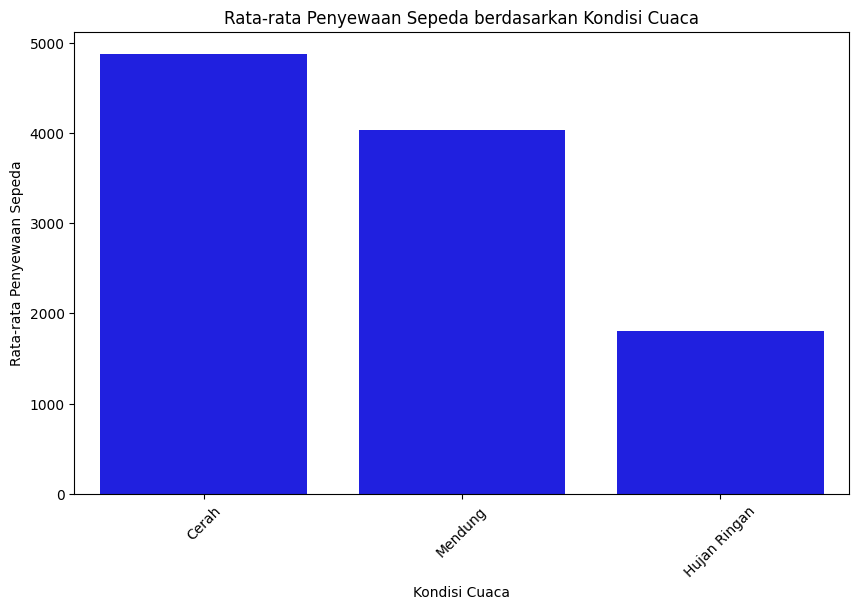

In [257]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_effect, color='blue', ax=ax)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=45)

# Pertanyaan 4:

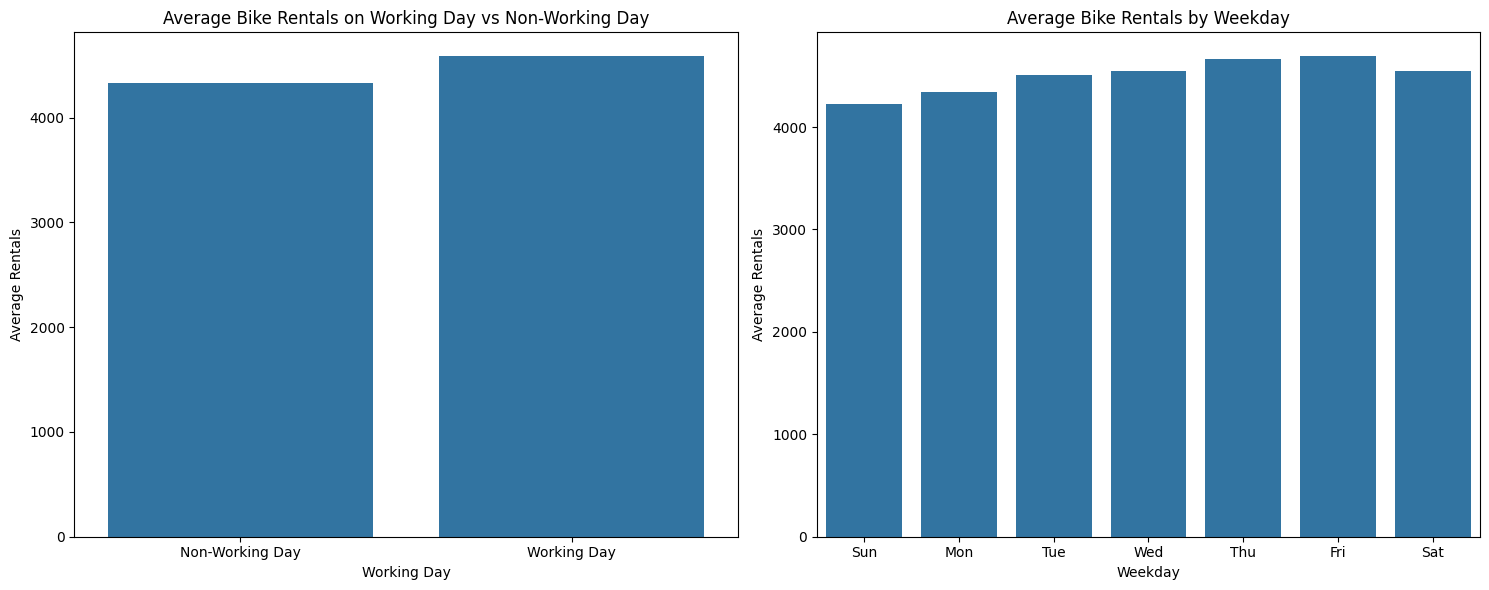

In [258]:
# Membuat figure dengan 1 baris dan 2 kolom
plt.figure(figsize=(15, 6))

# Visualisasi rata-rata penyewaan berdasarkan hari kerja
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot pertama
sns.barplot(data=avg_rentals_workingday, x='Working Day', y='Average Rentals')
plt.title('Average Bike Rentals on Working Day vs Non-Working Day')
plt.xticks(ticks=[0, 1], labels=['Non-Working Day', 'Working Day'])
plt.ylabel('Average Rentals')

# Visualisasi rata-rata penyewaan berdasarkan hari dalam seminggu
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, subplot kedua
sns.barplot(data=avg_rentals_weekday, x='Weekday', y='Average Rentals')
plt.title('Average Bike Rentals by Weekday')
plt.xticks(ticks=np.arange(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.ylabel('Average Rentals')

# Menampilkan visualisasi
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()


**Insight:**
- Kode pada pertanyaan pertama membuat visualisasi garis untuk menunjukkan pola penyewaan sepeda berdasarkan jam dalam sehari. Dengan visualisasi ini, Anda dapat melihat jam-jam puncak penyewaan sepeda. Misalnya, jika grafik menunjukkan puncak pada jam tertentu, ini mengindikasikan waktu-waktu ketika penyewaan sepeda paling banyak terjadi, mungkin karena jam sibuk di pagi atau sore hari.
- Kode pada pertanyaan kedua akan membuat histogram yang memberikan informasi tentang bagaimana suhu tersebar, apakah ada suhu ekstrem, dan rentang suhu yang paling umum. Scatter plot menunjukkan apakah ada hubungan positif atau negatif antara suhu dan penyewaan sepeda; jika terdapat tren naik pada garis regresi, ini menunjukkan bahwa saat suhu meningkat, penyewaan sepeda cenderung meningkat.
- Pada kode ketiga akan membuat grafik batang yang menunjukkan rata-rata penyewaan sepeda berdasarkan kondisi cuaca. Dari grafik ini, Anda dapat menganalisis bagaimana kondisi cuaca memengaruhi keputusan orang untuk menyewa sepeda. Misalnya, jika penyewaan lebih tinggi pada hari cerah, ini menunjukkan bahwa cuaca yang baik mendorong lebih banyak penyewaan sepeda.
- Pada kode keempat akan membuat dua subplot: satu untuk rata-rata penyewaan sepeda pada hari kerja dibandingkan dengan hari non-kerja, dan satu lagi untuk rata-rata penyewaan berdasarkan hari dalam seminggu. Grafik pertama menunjukkan perbedaan penyewaan antara hari kerja dan hari libur, yang dapat memberikan gambaran tentang perilaku pengguna sepeda berdasarkan status hari. Grafik kedua memberikan wawasan tentang pola penyewaan sepanjang minggu; misalnya, jika ada puncak penyewaan di akhir pekan, ini menunjukkan bahwa lebih banyak orang menggunakan sepeda untuk rekreasi saat libur.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Dari visualisasi garis yang menunjukkan rata-rata penyewaan sepeda berdasarkan jam, terdapat pola yang jelas. Umumnya, penyewaan sepeda meningkat di pagi hari dan sore hari, dengan puncaknya terjadi di antara jam 7-9 pagi dan 5-7 sore. Ini menunjukkan bahwa penggunaan sepeda lebih tinggi pada jam-jam sibuk, kemungkinan karena orang-orang menggunakan sepeda untuk pergi bekerja atau beraktivitas. Sebaliknya, pada malam hari, penyewaan sepeda cenderung menurun drastis.

- Conclution pertanyaan 2
Analisis menunjukkan adanya korelasi positif antara suhu dan jumlah penyewaan sepeda, dengan nilai korelasi yang signifikan. Dari histogram, distribusi suhu terlihat bervariasi, dan dari scatter plot, saat suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat. Ini menunjukkan bahwa suhu yang lebih tinggi mendorong lebih banyak orang untuk menyewa sepeda, mungkin karena cuaca yang lebih nyaman untuk beraktivitas di luar ruangan.

- Conclusion pertanyaan 3
Dari analisis rata-rata penyewaan berdasarkan kondisi cuaca, terlihat bahwa kondisi cuaca yang baik (cerah) memiliki rata-rata penyewaan yang jauh lebih tinggi dibandingkan dengan kondisi cuaca buruk (hujan ringan dan hujan berat). Ini menunjukkan bahwa cuaca yang buruk memiliki dampak negatif yang signifikan terhadap keputusan orang untuk menyewa sepeda, dengan penurunan penyewaan yang cukup tajam pada hari-hari hujan.

- Conclusion pertanyaan 4
Analisis menunjukkan bahwa penyewaan sepeda pada hari kerja (working day) lebih tinggi dibandingkan dengan hari non-kerja. Ini mengindikasikan bahwa banyak orang menggunakan sepeda sebagai sarana transportasi untuk pergi bekerja. Selain itu, analisis rata-rata penyewaan berdasarkan hari dalam seminggu menunjukkan variasi, dengan penyewaan yang lebih tinggi pada hari kerja (misalnya, Senin hingga Jumat) dan lebih rendah pada akhir pekan, meskipun ada kemungkinan penggunaan sepeda untuk rekreasi pada hari libur. Ini menunjukkan bahwa hari dalam seminggu juga berpengaruh pada pola penyewaan sepeda.
